In [1]:
import os
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import BatchNormalization, Dense, Flatten, Conv2D, Dropout, Input, MaxPool2D, AvgPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
classes.extend('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.upper().split())
classes.extend('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.lower().split())

In [2]:
linear_model = Sequential(name='linear_model')
linear_model.add(Input(shape=(128,128,1)))
linear_model.add(Flatten())
linear_model.add(Dense(256, activation='relu'))
linear_model.add(Dense(128, activation='relu'))
linear_model.add(Dense(64, activation='relu'))
linear_model.add(Dense(len(classes), activation='sigmoid'))
linear_model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
linear_model.summary()

Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4194560   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 62)                4030      
Total params: 4,239,742
Trainable params: 4,239,742
Non-trainable params: 0
_________________________________________________________________


In [3]:
conv_model = Sequential(name='conv_model')
conv_model.add(Input(shape=(128, 128, 1)))
conv_model.add(Conv2D(128, (3, 3), activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2, 2)))
conv_model.add(Conv2D(64, (3, 3), activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, (3, 3), activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(256, activation='relu'))
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(62, activation='sigmoid'))
conv_model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
conv_model.summary()

Model: "conv_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        1

In [4]:
%%time
X = []
y = []
l = 0
for dirpath, dirnames, filenames in os.walk('data/'):
    # print(dirpath)
    if dirpath is not 'data/':
        for f in filenames:
            # print(f)
            X.append(imread(f'{dirpath}/{f}'))
            y.append(l)
        l += 1
X = np.array(X)
X = np.expand_dims(X, axis=3)
X.reshape(X.shape[0], X.shape[1], X.shape[2])
y = np.array(y)
print(len(X))
print(len(y))
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)
del X, y

62992
62992
(62992, 128, 128, 1)
(62992,)
Wall time: 2min 13s


In [5]:
%%time
conv_model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
402/402 [==============================] - 1317s 3s/step - loss: 1.4731 - accuracy: 0.5950 - val_loss: 0.6168 - val_accuracy: 0.8006
Epoch 2/10
402/402 [==============================] - 1192s 3s/step - loss: 0.5078 - accuracy: 0.8260 - val_loss: 0.4773 - val_accuracy: 0.8297
Epoch 3/10
402/402 [==============================] - 1227s 3s/step - loss: 0.3923 - accuracy: 0.8518 - val_loss: 0.4211 - val_accuracy: 0.8485
Epoch 4/10
402/402 [==============================] - 1117s 3s/step - loss: 0.3264 - accuracy: 0.8716 - val_loss: 0.3930 - val_accuracy: 0.8612
Epoch 5/10
402/402 [==============================] - 1335s 3s/step - loss: 0.2817 - accuracy: 0.8849 - val_loss: 0.3780 - val_accuracy: 0.8620
Epoch 6/10
402/402 [==============================] - 1245s 3s/step - loss: 0.2594 - accuracy: 0.8910 - val_loss: 0.3686 - val_accuracy: 0.8755
Epoch 7/10
402/402 [==============================] - 1303s 3s/step - loss: 0.2363 - accuracy: 0.8987 - val_loss: 0.3820 - val_accuracy:

In [6]:
conv_model.save('conv_model_10.h5')

In [7]:
%%time
history = conv_model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
402/402 [==============================] - 1255s 3s/step - loss: 0.1895 - accuracy: 0.9151 - val_loss: 0.3328 - val_accuracy: 0.8850
Epoch 2/5
402/402 [==============================] - 1158s 3s/step - loss: 0.1808 - accuracy: 0.9190 - val_loss: 0.3605 - val_accuracy: 0.8799
Epoch 3/5
402/402 [==============================] - 1183s 3s/step - loss: 0.1768 - accuracy: 0.9211 - val_loss: 0.3296 - val_accuracy: 0.8822
Epoch 4/5
402/402 [==============================] - 1220s 3s/step - loss: 0.1700 - accuracy: 0.9231 - val_loss: 0.3185 - val_accuracy: 0.8939
Epoch 5/5
402/402 [==============================] - 1241s 3s/step - loss: 0.1602 - accuracy: 0.9265 - val_loss: 0.3243 - val_accuracy: 0.8967
Wall time: 1h 41min 14s


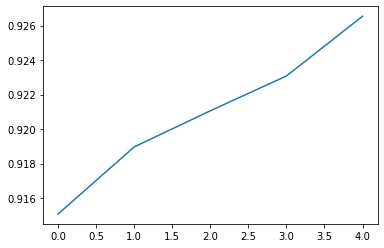

In [8]:
plt.plot(history.history['accuracy'])

In [9]:
conv_model.save('conv_model_15.h5')